# Preprocessing the PEP725 data

*Data were provided by the members of the PEP725 project*

*Templ, B., Koch, E., Bolmgren, K., Ungersböck, M., Paul, A., Scheifinger, H., et al.*
*(2018). Pan European Phenological database (PEP725): a single point of access for*
*European data. Int. J. Biometeorology. doi: 10.1007/s00484-018-1512-8*
*Data set accessed 2022-11-08 at http://www.pep725.eu*

# Table of contents
1. [Loading and first glance of the data](#loading)
2. [Grouping based on vegetation group](#grouping)
3. [Removing unecessary columns](#removing)
4. [Adding the spatial aspect to the data](#spatial)
5. [Writing the data](#writing)
6. [GeoJSON Problem](#problemo)

In [1]:
import pandas as pd
import os.path

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Loading and first glance of the data <a class="anchor" id="loading"></a>

In [2]:
# Read the PEP725 dataset

data_dir = r"C:\Users\Kostas\Desktop\GIMA\Module_7\Data\PEP725\After_2016_sent_from_PEP725"
dataset = os.path.join(data_dir, 'pep725_20221108_0.csv')
df = pd.read_csv(dataset, sep=';', low_memory=False) # Because columns have mixed data types, pandas suggested to use low_memory=False  

# Check the dimensions of the dataframe
df.shape

(338757, 18)

In [3]:
df.head()

,s_id,provider_id,lon,lat,alt,alt_dem,gss_id,genus,species,subspecies,phase_id,year,day,date,cult_season,affected_flag,qc_flag,qc_ori_flag
0,19544,101,7.41667,51.4500,114,151,10000,perm_grass,NaN,NaN,182,2017,9,2017-01-09,0,0,0,101007
1,1708,101,8.68333,51.7333,105,101,1360100,Corylus,Corylus avellana,NaN,60,2017,12,2017-01-12,0,0,0,101007
2,8139,101,7.65000,53.2667,3,4,1360100,Corylus,Corylus avellana,NaN,60,2017,13,2017-01-13,0,0,0,101007
3,232,101,9.83333,54.6167,20,25,1600100,Galanthus,Galanthus nivalis,NaN,60,2017,15,2017-01-15,0,0,0,101007
4,1975,101,9.00000,49.6833,210,199,1360100,Corylus,Corylus avellana,NaN,60,2017,15,2017-01-15,0,0,0,101007


In [4]:
# # Check if provider is the same in all rows
# station_check = df.loc[df.provider_id == 101]
# station_check.shape

Check genus record count

In [3]:
all = df.groupby('genus').genus.count().sort_values(ascending=True)

In [4]:
# Get the names of the genuses alphabetically
df.genus.drop_duplicates().sort_values()

2567           Acer
3329       Aesculus
23            Alnus
13362    Alopecurus
640         Anemone
46152     Artemisia
1572          Avena
3644           Beta
2553         Betula
49853       Calluna
187          Cornus
1           Corylus
7747          Fagus
1700      Forsythia
4171       Fraxinus
3         Galanthus
12492    Helianthus
3482        Hordeum
3417          Larix
5783          Malus
13920         Picea
1709         Prunus
3653          Pyrus
4898        Quercus
580           Ribes
23374       Robinia
30            Salix
11007      Sambucus
4860         Secale
3448         Sorbus
8036        Syringa
3575      Taraxacum
45294         Tilia
4233       Triticum
665       Tussilago
1562          Vitis
6337            Zea
0        perm_grass
Name: genus, dtype: object

## 2. Grouping based on vegetation group as shown in Tian et al., 2021 <a class="anchor" id="grouping"></a>

I am making 3 different dataframes with the respective groups from the paper. Each dataframe has a "Label" column that specifies its category: \
**DBL**: deciduous broad leaved tree, **EC**: evergreen coniferous and **M**: meadow.

In [5]:
deciduous_broad_leaved = df.loc[df.genus.isin([
'Acer',
'Aesculus',
'Alnus',
'Betula',
'Fagus',
'Fraxinus',
'Quercus',
'Robinia',
'Salix',
'Sambucus',
'Sorbus',
'Syringa',
'Tilia',
])]

# Insert a column in the end as a label for this class
deciduous_broad_leaved['Label'] = 'DBL'

deciduous_broad_leaved.head()


C:\Users\Kostas\AppData\Local\Temp\ipykernel_12848\176937586.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deciduous_broad_leaved['Label'] = 'DBL'


,s_id,provider_id,lon,lat,alt,alt_dem,gss_id,genus,species,subspecies,phase_id,year,day,date,cult_season,affected_flag,qc_flag,qc_ori_flag,Label
23,5363,101,13.91670,54.0833,2,0,1050100,Alnus,Alnus glutinosa,NaN,60,2017,27,2017-01-27,0,0,0,101007,DBL
30,1554,101,7.51667,51.7333,60,72,2210500,Salix,Salix caprea,NaN,60,2017,29,2017-01-29,0,0,0,101007,DBL
42,3120,101,8.68333,49.5500,140,261,1050100,Alnus,Alnus glutinosa,NaN,60,2017,31,2017-01-31,0,0,0,101007,DBL
53,2021,101,8.58333,50.0000,100,101,1050100,Alnus,Alnus glutinosa,NaN,60,2017,32,2017-02-01,0,0,0,101007,DBL
63,1521,101,7.83333,51.7000,60,58,1050100,Alnus,Alnus glutinosa,NaN,60,2017,33,2017-02-02,0,0,0,101007,DBL


In [6]:
deciduous_broad_leaved.shape

(113484, 19)

In [7]:
deciduous_broad_leaved.groupby('genus').genus.count().sort_values(ascending=True)

genus
Tilia          39
Robinia      3697
Acer         4202
Salix        4651
Syringa      4961
Fraxinus     7683
Alnus        8024
Fagus        8592
Sambucus     9473
Sorbus      13286
Betula      13748
Quercus     16990
Aesculus    18138
Name: genus, dtype: int64

In [10]:
#deciduous_broad_leaved.to_csv('deciduous_broad_leaved.csv')

In [8]:
evergreen_coniferous = df.loc[df.genus.isin(['Picea', 'Pinus'])]
evergreen_coniferous['Label'] = 'EC'
evergreen_coniferous.head(10)

C:\Users\Kostas\AppData\Local\Temp\ipykernel_12848\3948884640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evergreen_coniferous['Label'] = 'EC'


,s_id,provider_id,lon,lat,alt,alt_dem,gss_id,genus,species,subspecies,phase_id,year,day,date,cult_season,affected_flag,qc_flag,qc_ori_flag,Label
13920,19310,101,6.93333,51.1500,40,42,2030100,Picea,Picea abies,NaN,10,2017,92,2017-04-02,0,0,0,101007,EC
14218,2019,101,8.48333,49.9167,90,80,2030100,Picea,Picea abies,NaN,10,2017,93,2017-04-03,0,0,0,101007,EC
14453,3663,101,12.55000,48.0333,500,545,2030100,Picea,Picea abies,NaN,10,2017,93,2017-04-03,0,0,0,101007,EC
15168,2356,101,9.01667,50.1500,130,106,2030100,Picea,Picea abies,NaN,10,2017,94,2017-04-04,0,0,0,101007,EC
15235,2805,101,8.18333,49.4333,160,116,2030100,Picea,Picea abies,NaN,10,2017,94,2017-04-04,0,0,0,101007,EC
16715,2389,101,8.06667,50.0333,220,152,2030100,Picea,Picea abies,NaN,10,2017,96,2017-04-06,0,0,0,101007,EC
17416,2417,101,8.11667,50.0833,280,315,2030100,Picea,Picea abies,NaN,10,2017,97,2017-04-07,0,0,0,101007,EC
17813,21395,101,7.76667,52.0500,50,50,2030100,Picea,Picea abies,NaN,10,2017,97,2017-04-07,0,0,0,101007,EC
18039,2349,101,9.28333,50.2500,160,162,2030100,Picea,Picea abies,NaN,10,2017,98,2017-04-08,0,0,0,101007,EC
18081,2704,101,8.20000,49.7833,150,130,2030100,Picea,Picea abies,NaN,10,2017,98,2017-04-08,0,0,0,101007,EC


In [9]:
evergreen_coniferous.genus.value_counts()

Picea    4497
Name: genus, dtype: int64

##### results indicate that there is only the Picea genus present

In [10]:
df.loc[df.genus == 'Meadow']

,s_id,provider_id,lon,lat,alt,alt_dem,gss_id,genus,species,subspecies,phase_id,year,day,date,cult_season,affected_flag,qc_flag,qc_ori_flag


There is no "Meadow" present, but there is a "perm_grass" class, so this is what I will use for the third class

In [11]:
df.loc[df.genus == 'perm_grass'].shape

(11349, 18)

It seems that there are 11349 records of this, so let's create a Meadow dataframe to add the results there

In [12]:
meadow = df.loc[df.genus == 'perm_grass']
meadow['Label'] = 'M'
meadow.head()

C:\Users\Kostas\AppData\Local\Temp\ipykernel_12848\3734825887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meadow['Label'] = 'M'


,s_id,provider_id,lon,lat,alt,alt_dem,gss_id,genus,species,subspecies,phase_id,year,day,date,cult_season,affected_flag,qc_flag,qc_ori_flag,Label
0,19544,101,7.41667,51.4500,114,151,10000,perm_grass,NaN,NaN,182,2017,9,2017-01-09,0,0,0,101007,M
101,4573,101,10.83330,48.2667,520,511,10000,perm_grass,NaN,NaN,182,2017,35,2017-02-04,0,0,0,101007,M
106,329,101,8.41667,54.7500,3,0,10000,perm_grass,NaN,NaN,182,2017,36,2017-02-05,0,0,0,101007,M
228,711,101,11.36670,53.0500,20,4,10000,perm_grass,NaN,NaN,182,2017,43,2017-02-12,0,0,0,101007,M
237,1873,101,7.33333,51.3167,170,177,10000,perm_grass,NaN,NaN,182,2017,43,2017-02-12,0,0,0,101007,M


Creating a combined dataframe of the classes of interest and plotting the observation counts by year

<AxesSubplot: xlabel='Label,year'>

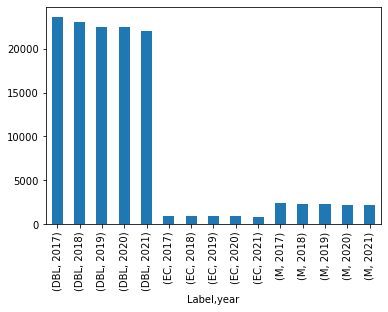

In [13]:
# This will stack the dfs vertically and then plot the count by year

combined_dfs = pd.concat([deciduous_broad_leaved, evergreen_coniferous, meadow], axis=0)
combined_dfs.groupby(['Label', 'year']).size().plot.bar()


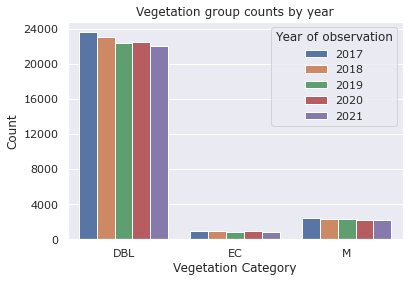

In [14]:
# Using seaborn for better visualisation

sns.set_theme(style="darkgrid", font="Verdana")
ax = sns.countplot(data=combined_dfs, x="Label", hue="year")
ax.set(title="Vegetation group counts by year", xlabel="Vegetation Category", ylabel="Count")
ax.set_yticks(range(0, 25000, 4000))

# Change label title
plt.legend(title="Year of observation")




In [15]:
combined_dfs.year.value_counts()

2017    26932
2018    26254
2019    25589
2020    25470
2021    25085
Name: year, dtype: int64

## 3. Removing unecessary columns <a class="anchor" id="removing"></a>

In [16]:
combined_dfs[combined_dfs.phase_id > 99]

,s_id,provider_id,lon,lat,alt,alt_dem,gss_id,genus,species,subspecies,phase_id,year,day,date,cult_season,affected_flag,qc_flag,qc_ori_flag,Label
48825,19544,101,7.41667,51.4500,114,151,2290100,Sorbus,Sorbus aucuparia,NaN,286,2017,179,2017-06-28,0,0,0,101007,DBL
49037,4866,101,13.23330,51.8167,80,70,2290100,Sorbus,Sorbus aucuparia,NaN,286,2017,181,2017-06-30,0,0,0,101007,DBL
49268,2733,101,8.13333,49.3500,140,146,2290100,Sorbus,Sorbus aucuparia,NaN,286,2017,183,2017-07-02,0,0,0,101007,DBL
49306,4632,101,7.05000,49.1667,230,306,2290100,Sorbus,Sorbus aucuparia,NaN,286,2017,183,2017-07-02,0,0,0,101007,DBL
49377,1887,101,7.66667,51.5833,60,53,2290100,Sorbus,Sorbus aucuparia,NaN,286,2017,184,2017-07-03,0,0,0,101007,DBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325909,5456,101,13.75000,50.7333,875,864,10000,perm_grass,NaN,NaN,131,2021,244,2021-09-01,0,0,0,101007,M
326955,961,101,7.50000,52.7667,30,33,10000,perm_grass,NaN,NaN,111,2021,257,2021-09-14,0,0,0,101007,M
327180,20595,101,8.50000,49.4667,95,86,10000,perm_grass,NaN,NaN,131,2021,258,2021-09-15,0,0,0,101007,M
333225,19312,101,8.36667,48.6000,490,622,10000,perm_grass,NaN,NaN,131,2021,285,2021-10-12,0,0,0,101007,M


In [17]:
# Checking how the days are numbered.
combined_dfs[combined_dfs["date"] > "2017-02-30"].head()

,s_id,provider_id,lon,lat,alt,alt_dem,gss_id,genus,species,subspecies,phase_id,year,day,date,cult_season,affected_flag,qc_flag,qc_ori_flag,Label
2288,124,101,9.13333,54.6667,20,8,2210500,Salix,Salix caprea,NaN,60,2017,60,2017-03-01,0,0,0,101007,DBL
2293,238,101,9.40000,54.5500,11,15,2210500,Salix,Salix caprea,NaN,60,2017,60,2017-03-01,0,0,0,101007,DBL
2296,349,101,10.18330,53.6000,40,38,1050100,Alnus,Alnus glutinosa,NaN,60,2017,60,2017-03-01,0,0,0,101007,DBL
2298,354,101,8.50000,52.7000,35,41,1050100,Alnus,Alnus glutinosa,NaN,60,2017,60,2017-03-01,0,0,0,101007,DBL
2307,1298,101,7.33333,51.1333,220,275,1050100,Alnus,Alnus glutinosa,NaN,60,2017,60,2017-03-01,0,0,0,101007,DBL


They seem to pass the 30 day mark so they symbolize the day of the year (0-365)

In [18]:
combined_dfs.qc_flag.value_counts()

0    129330
Name: qc_flag, dtype: int64

In [19]:
combined_dfs.loc[combined_dfs["affected_flag"] == 1]

,s_id,provider_id,lon,lat,alt,alt_dem,gss_id,genus,species,subspecies,phase_id,year,day,date,cult_season,affected_flag,qc_flag,qc_ori_flag,Label
208535,19544,101,7.41667,51.45,114,151,10000,perm_grass,NaN,NaN,182,2019,362,2019-12-28,0,1,0,101007,M


In [20]:
combined_dfs.index[combined_dfs["affected_flag"] == 1]

Int64Index([208535], dtype='int64')

In [21]:
# Removing this because it is just 1 out of 129,000

combined_dfs.drop([208535], inplace=True);
combined_dfs.shape

(129329, 19)

Below I am trying to find out how much variability is in the counts of the values of the columns. \
In case all the records of a column have the same value, the column can be deleted.

In [22]:
# Get value counts for the columns 

# Columns of interest to check
cols = ['provider_id', 'subspecies', 'cult_season', 'affected_flag', 'qc_flag', 'qc_ori_flag']
counts = []
for col in cols:
    tmp_series = combined_dfs[col].value_counts()
    tmp_series.name = col
    counts.append(tmp_series)
combined_dfs_value_counts = pd.concat(counts, axis=1)


In [23]:
combined_dfs_value_counts

,provider_id,subspecies,cult_season,affected_flag,qc_flag,qc_ori_flag
101,129329.0,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,129329.0,129329.0,129329.0,NaN
101007,NaN,NaN,NaN,NaN,NaN,129329.0


In [24]:
combined_dfs.shape

(129329, 19)

The values are uniform for all the data for those columns, so I am dropping them

In [25]:
combined_dfs.drop(cols, axis=1, inplace=True)
combined_dfs.shape

(129329, 13)

## 4. Adding the spatial aspect to the data <a class="anchor" id="spatial"></a>

The dataframe has the coordinates in two separate fields, with no geospatial meaning yet. \
Therefore, it needs to be transformed to a GeoDataFrame to work with geopandas. \
A GeoDataFrame needs a shapely object, so the lon lat values will be transformed to points and will be set as the geometry of the GeoDataFrame.

In [26]:
import geopandas as gpd

Creating a combined geodataframe with the WGS 84 / UTM zone 32N that is used in Germany. Web Mercator was considered as an option \
but it is not suitable for distance calculations, which will happen later with the buffer calculations

In [31]:
# Creating a combined geodataframe. I'm specifying the crs as WGS84.

combined_gdf = gpd.GeoDataFrame(combined_dfs, geometry=gpd.points_from_xy(combined_dfs.lon, combined_dfs.lat, combined_dfs.alt, crs='4326'))

In [33]:
# Reprojecting to WGS 84 / UTM zone 32N
combined_gdf.to_crs(crs='EPSG:32632', inplace=True)
combined_gdf.crs

<Derived Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
combined_gdf.tail()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
325909,5456,13.75000,50.7333,875,864,10000,perm_grass,NaN,131,2021,244,2021-09-01,M,POINT Z (835136.405 5630933.921 875.000)
326955,961,7.50000,52.7667,30,33,10000,perm_grass,NaN,111,2021,257,2021-09-14,M,POINT Z (398795.749 5847373.189 30.000)
327180,20595,8.50000,49.4667,95,86,10000,perm_grass,NaN,131,2021,258,2021-09-15,M,POINT Z (463771.720 5479458.856 95.000)
333225,19312,8.36667,48.6000,490,622,10000,perm_grass,NaN,131,2021,285,2021-10-12,M,POINT Z (453306.954 5383184.811 490.000)
334122,8197,10.98330,48.2333,525,504,10000,perm_grass,NaN,111,2021,289,2021-10-16,M,POINT Z (647273.716 5344132.606 525.000)


In [35]:
combined_gdf.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
23,5363,13.91670,54.0833,2,0,1050100,Alnus,Alnus glutinosa,60,2017,27,2017-01-27,DBL,POINT Z (821520.468 6003973.720 2.000)
30,1554,7.51667,51.7333,60,72,2210500,Salix,Salix caprea,60,2017,29,2017-01-29,DBL,POINT Z (397567.206 5732416.903 60.000)
42,3120,8.68333,49.5500,140,261,1050100,Alnus,Alnus glutinosa,60,2017,31,2017-01-31,DBL,POINT Z (477094.080 5488647.767 140.000)
53,2021,8.58333,50.0000,100,101,1050100,Alnus,Alnus glutinosa,60,2017,32,2017-02-01,DBL,POINT Z (470138.525 5538713.881 100.000)
63,1521,7.83333,51.7000,60,58,1050100,Alnus,Alnus glutinosa,60,2017,33,2017-02-02,DBL,POINT Z (419374.473 5728316.443 60.000)


In [36]:
# Make a function for quick plotting
# Load the lowres map of gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('EPSG:32632')

def germany_plot(geodataframe, basemap):  
    
    # Restrict the boundary to germany
    ax = basemap[basemap.name == 'Germany'].plot(color='gray', figsize=(10,10))
    # Plot the data
    geodataframe.plot(ax=ax, color='green')


In [37]:
gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

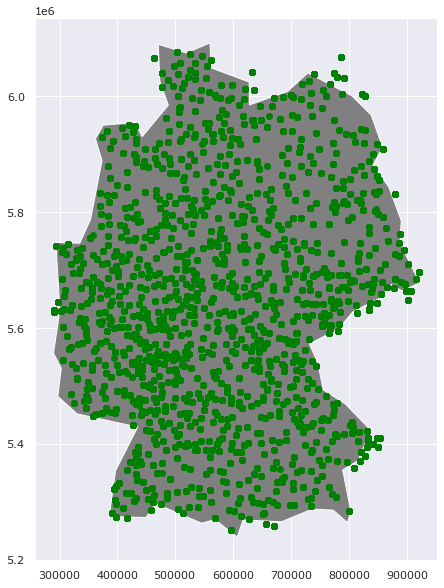

In [38]:
germany_plot(combined_gdf, world)

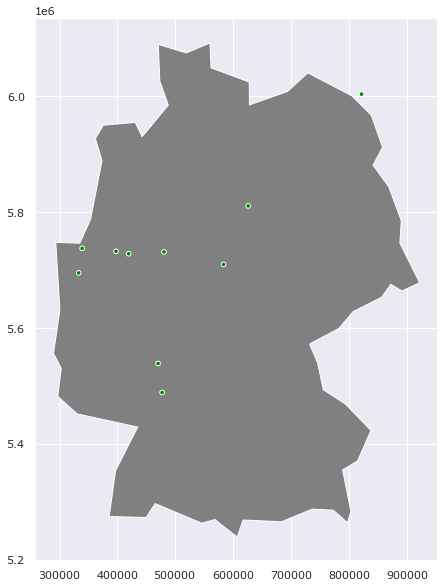

In [39]:
# Check with 10 points to see the visualisation of the buffers
germany_plot(combined_gdf.iloc[0:10].geometry.buffer(4000), world)


In [40]:
# Get the buffers of all points with a radious of 4km
buffers = combined_gdf.geometry.buffer(4000)

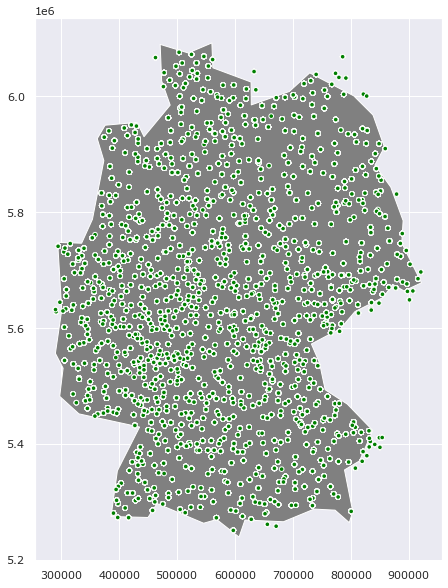

In [ ]:
germany_plot(buffers, world)

In [41]:
buffers.head()

23    POLYGON ((825520.468 6003973.720, 825501.207 6...
30    POLYGON ((401567.206 5732416.903, 401547.945 5...
42    POLYGON ((481094.080 5488647.767, 481074.819 5...
53    POLYGON ((474138.525 5538713.881, 474119.264 5...
63    POLYGON ((423374.473 5728316.443, 423355.212 5...
dtype: geometry

Now the buffers will be joined to the geodataframe

Pandas will be used for this, because a normal and not a spatial join is needed, \
but the geometry column of the buffers will be renamed to avoid a mixup with the point geometry

In [42]:
# Renaming the geometry column of the buffers. Inplace True is used to avoid creating a new object.
# buffers is a GeoSeries and not a GeoDataFrame, so the pandas method rename is used.

buffers.rename('buffer_geometry', inplace=True)

23        POLYGON ((825520.468 6003973.720, 825501.207 6...
30        POLYGON ((401567.206 5732416.903, 401547.945 5...
42        POLYGON ((481094.080 5488647.767, 481074.819 5...
53        POLYGON ((474138.525 5538713.881, 474119.264 5...
63        POLYGON ((423374.473 5728316.443, 423355.212 5...
                                ...                        
325909    POLYGON ((839136.405 5630933.921, 839117.144 5...
326955    POLYGON ((402795.749 5847373.189, 402776.488 5...
327180    POLYGON ((467771.720 5479458.856, 467752.459 5...
333225    POLYGON ((457306.954 5383184.811, 457287.692 5...
334122    POLYGON ((651273.716 5344132.606, 651254.454 5...
Name: buffer_geometry, Length: 129329, dtype: geometry

In [43]:
buffers.shape

(129329,)

In [44]:
combined_gdf.shape

(129329, 14)

In [45]:
# Merge the geodataframe with the buffer
merged_gdf = combined_gdf.merge(buffers, left_index=True, right_index=True)

In [46]:
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 129329 entries, 23 to 334122
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   s_id             129329 non-null  int64   
 1   lon              129329 non-null  float64 
 2   lat              129329 non-null  float64 
 3   alt              129329 non-null  int64   
 4   alt_dem          129329 non-null  int64   
 5   gss_id           129329 non-null  int64   
 6   genus            129329 non-null  object  
 7   species          117981 non-null  object  
 8   phase_id         129329 non-null  int64   
 9   year             129329 non-null  int64   
 10  day              129329 non-null  int64   
 11  date             129329 non-null  object  
 12  Label            129329 non-null  object  
 13  geometry         129329 non-null  geometry
 14  buffer_geometry  129329 non-null  geometry
dtypes: float64(2), geometry(2), int64(7), object(4)
memory usag

In [47]:
# Check a random record

merged_gdf.head(1)

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry,buffer_geometry
23,5363,13.9167,54.0833,2,0,1050100,Alnus,Alnus glutinosa,60,2017,27,2017-01-27,DBL,POINT Z (821520.468 6003973.720 2.000),"POLYGON ((825520.468 6003973.720, 825501.207 6..."


In [ ]:
# This does not work, but I checked it with QGIS. I think that the zoom levels need to be adjusted, but it doesn't matter for now


# # Plot the points and the buffers from the same gdf 

# ax = world[world.name == 'Germany'].plot(color='gray', figsize=(10,10), zorder=1)

# merged_gdf.buffer_geometry.plot(ax=ax, color='red', zorder=2)
# #merged_gdf.geometry.plot(ax=ax, color='blue', zorder=3)

In [48]:
# Creating a geodataframe from the buffers because it is a GeoSeries and it cannot be exported

buffers_gdf = merged_gdf.drop(['geometry'], axis=1).set_geometry('buffer_geometry').rename_geometry('geometry')

In [49]:
buffers_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 129329 entries, 23 to 334122
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   s_id      129329 non-null  int64   
 1   lon       129329 non-null  float64 
 2   lat       129329 non-null  float64 
 3   alt       129329 non-null  int64   
 4   alt_dem   129329 non-null  int64   
 5   gss_id    129329 non-null  int64   
 6   genus     129329 non-null  object  
 7   species   117981 non-null  object  
 8   phase_id  129329 non-null  int64   
 9   year      129329 non-null  int64   
 10  day       129329 non-null  int64   
 11  date      129329 non-null  object  
 12  Label     129329 non-null  object  
 13  geometry  129329 non-null  geometry
dtypes: float64(2), geometry(1), int64(7), object(4)
memory usage: 18.8+ MB


In [50]:
buffers_gdf.crs

<Derived Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## 5. Writing the data <a class="anchor" id="writing"></a>

Note: the gdfs are still in UTM zone 32N

#### Exporting to WGS84/UTM zone 32N

In [51]:
# Create a folder in the data directory to output the files.
output_folder = os.path.join(data_dir, "pep725_outputs")

if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [52]:
combined_gdf.crs

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
23,5363,13.91670,54.0833,2,0,1050100,Alnus,Alnus glutinosa,60,2017,27,2017-01-27,DBL,POINT Z (821520.468 6003973.720 2.000)
30,1554,7.51667,51.7333,60,72,2210500,Salix,Salix caprea,60,2017,29,2017-01-29,DBL,POINT Z (397567.206 5732416.903 60.000)
42,3120,8.68333,49.5500,140,261,1050100,Alnus,Alnus glutinosa,60,2017,31,2017-01-31,DBL,POINT Z (477094.080 5488647.767 140.000)
53,2021,8.58333,50.0000,100,101,1050100,Alnus,Alnus glutinosa,60,2017,32,2017-02-01,DBL,POINT Z (470138.525 5538713.881 100.000)
63,1521,7.83333,51.7000,60,58,1050100,Alnus,Alnus glutinosa,60,2017,33,2017-02-02,DBL,POINT Z (419374.473 5728316.443 60.000)


In [53]:
combined_gdf.to_file(os.path.join(output_folder, 'PEP725_stations.geojson'), driver='GeoJSON')

In [54]:
buffers_gdf.to_file(os.path.join(output_folder, 'PEP725_buffers.geojson'), driver="GeoJSON")

In [ ]:
buffers_gdf.tail()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
325909,5456,13.75000,50.7333,875,864,10000,perm_grass,NaN,131,2021,244,2021-09-01,M,"POLYGON ((839136.405 5630933.921, 839117.144 5..."
326955,961,7.50000,52.7667,30,33,10000,perm_grass,NaN,111,2021,257,2021-09-14,M,"POLYGON ((402795.749 5847373.189, 402776.488 5..."
327180,20595,8.50000,49.4667,95,86,10000,perm_grass,NaN,131,2021,258,2021-09-15,M,"POLYGON ((467771.720 5479458.856, 467752.459 5..."
333225,19312,8.36667,48.6000,490,622,10000,perm_grass,NaN,131,2021,285,2021-10-12,M,"POLYGON ((457306.954 5383184.811, 457287.692 5..."
334122,8197,10.98330,48.2333,525,504,10000,perm_grass,NaN,111,2021,289,2021-10-16,M,"POLYGON ((651273.716 5344132.606, 651254.454 5..."


#### Exporting to WGS84

In [55]:
combined_gdf.to_crs(4326).to_file(os.path.join(output_folder, 'PEP725_stations_WGS84.geojson'), driver='GeoJSON')

In [58]:
## Check to see if the reprojection works as intended
combined_gdf.iloc[:10].to_crs(4326).head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,Label,geometry
23,5363,13.91670,54.0833,2,0,1050100,Alnus,Alnus glutinosa,60,2017,27,2017-01-27,DBL,POINT Z (13.91670 54.08330 2.00000)
30,1554,7.51667,51.7333,60,72,2210500,Salix,Salix caprea,60,2017,29,2017-01-29,DBL,POINT Z (7.51667 51.73330 60.00000)
42,3120,8.68333,49.5500,140,261,1050100,Alnus,Alnus glutinosa,60,2017,31,2017-01-31,DBL,POINT Z (8.68333 49.55000 140.00000)
53,2021,8.58333,50.0000,100,101,1050100,Alnus,Alnus glutinosa,60,2017,32,2017-02-01,DBL,POINT Z (8.58333 50.00000 100.00000)
63,1521,7.83333,51.7000,60,58,1050100,Alnus,Alnus glutinosa,60,2017,33,2017-02-02,DBL,POINT Z (7.83333 51.70000 60.00000)


In [56]:
buffers_gdf.to_crs(4326).to_file(os.path.join(output_folder, 'PEP725_buffers_WGS84.geojson'), driver="GeoJSON")

Export a sample of the points and the buffers to visualize them in a GIS

In [ ]:
# Switching back to WGS84 to use for the STAC query in case it only accepts this one.

buffers_gdf.iloc[0:10].to_crs("EPSG:4326").to_file(os.path.join(output_folder, 'PEP725_10_buffers_WGS84.geojson'), driver="GeoJSON")

In [ ]:
combined_gdf.iloc[0:50].to_file(os.path.join(output_folder, 'PEP725_50_points.geojson'), driver="GeoJSON")

Exporting all the stations for visualization


In [ ]:
combined_gdf.s_id.value_counts()

5501     156
5550     156
5554     155
5576     154
5643     151
        ... 
2509       1
26749      1
4836       1
685        1
2558       1
Name: s_id, Length: 1235, dtype: int64

In [ ]:
# Dissolve to get only the stations
stations_gdf = combined_gdf.dissolve(by='s_id')

In [53]:
stations_gdf.to_file(os.path.join(output_folder, "PEP725_stations.geojson"), driver='GeoJSON', crs='EPSG:32632')

NameError: name 'stations_gdf' is not defined

In [ ]:
buffers_gdf.iloc[0:50].to_file(os.path.join(output_folder, 'PEP725_50_buffers.geojson'), driver="GeoJSON")

Exporting specific buffers to show the 4km range

In [ ]:
buffers_4km_range = buffers_gdf[(buffers_gdf['s_id']==1276) | (buffers_gdf['s_id']==1234) | (buffers_gdf['s_id']==1328)].dissolve('s_id')
buffers_4km_range.to_file(os.path.join(output_folder, 'PEP725_3_buffers_4km.geojson'), driver='GeoJSON')

## 6. GeoJSON problem <a class="anchor" id="problemo"></a>

### Trying to find out why the geojson output cannot load in stac.

After much searching, I believe that geopandas outputs an older geojson format \
that needs to be updated and the crs line needs to be deleted. 

This is mostly through digging and trial-and-error, so I don't know if it's the correct solution, but it works so i'm leaving it at that.

There are 2 things to do to make it work:
1. Delete the line that specifies the crs in the GeoJSON file
2. As seen in the GeoJSON documentation *Polygons and MultiPolygons should follow the right-hand rule.*
  which is apparently not the case with the output files above. 
  [This tool from mapster](https://mapstertech.github.io/mapster-right-hand-rule-fixer/) fixes exactly that
  You can input a GeoJSON file and it applies the right hand rule.

More info on this in this [link](https://gis.stackexchange.com/questions/259944/polygons-and-multipolygons-should-follow-the-right-hand-rule)

In [ ]:
#gpd.show_versions()

In [ ]:
#import pyproj
#pyproj.show_versions()

In [ ]:
#pyproj.datadir.get_data_dir()